In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('dataset.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
X=df.drop(labels=['target'],axis=1)
y=df['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

df.columns

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
df['target'].unique()

array([1, 0])

In [18]:
for i in df.columns:
    print(i,df[i].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

In [11]:
scaler=StandardScaler()

In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
X_train_scaled


array([[-1.67339636, -1.39443338,  0.95280942, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-2.76362385,  0.71713717, -0.01367669, ...,  0.955317  ,
        -0.67629057, -0.54888242],
       [-0.47414611, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242],
       ...,
       [ 1.59728613,  0.71713717,  1.91929553, ..., -0.67796691,
         0.37792709, -0.54888242],
       [-0.91023711,  0.71713717, -0.9801628 , ...,  0.955317  ,
        -0.67629057,  1.13753893],
       [ 0.94314964, -1.39443338, -0.01367669, ...,  0.955317  ,
         1.43214475, -0.54888242]])

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [14]:
rf=RandomForestClassifier(n_estimators=100,max_depth=10)

In [15]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(max_depth=10)

In [16]:
y_pred_test=rf.predict(X_test_scaled)

In [17]:
from sklearn.metrics import accuracy_score,precision_score,f1_score

In [18]:
ac=accuracy_score(y_test,y_pred_test)
pr=precision_score(y_test,y_pred_test)
f1=f1_score(y_test,y_pred_test)

In [19]:
ac

0.8131868131868132

In [20]:
pr

0.8235294117647058

In [21]:
f1

0.8316831683168315

In [22]:
import time

import numpy as np

start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.019 seconds


In [23]:
importances

array([0.08696265, 0.03223309, 0.09550675, 0.07541158, 0.07063453,
       0.01143097, 0.01807425, 0.10405446, 0.07986764, 0.09292901,
       0.05554792, 0.16269264, 0.11465451])

In [26]:
features=X.columns

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

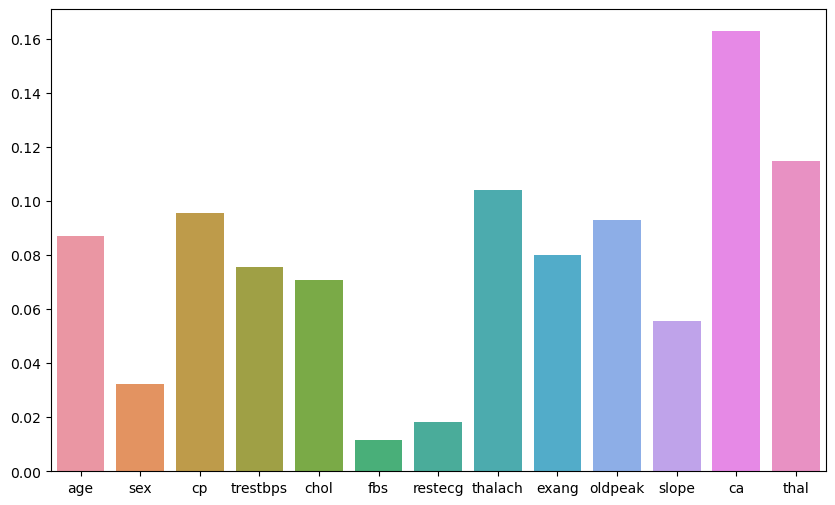

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x=features,y=importances)

In [29]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
        'n_estimators':[100,200,300],
        'criterion':['gini','entropy'],
        'min_samples_split':[1,2],
        'min_samples_leaf':[1,2]        
              }

In [30]:
from sklearn.model_selection import RandomizedSearchCV
classifier=RandomForestClassifier()

In [31]:
cv=RandomizedSearchCV(classifier,param_distributions=params,scoring='accuracy',cv=5,verbose=3)
cv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=0.837 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=0.837 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=0.714 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=0.833 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=300;, score=0.738 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.4s
[CV

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [1, 2],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [32]:
cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 1,
 'min_samples_leaf': 1,
 'max_depth': 3,
 'criterion': 'gini'}

In [33]:
y_pred=cv.predict(X_test)

In [35]:
ac1=accuracy_score(y_test,y_pred)
pr1=precision_score(y_test,y_pred)
f1_1=f1_score(y_test,y_pred)

In [36]:
ac1,pr1,f1_1

(0.8571428571428571, 0.8490566037735849, 0.8737864077669903)

In [37]:
ac,pr,f1

(0.8131868131868132, 0.8235294117647058, 0.8316831683168315)

Text(0.5, 0, 'For random classifier with default params')

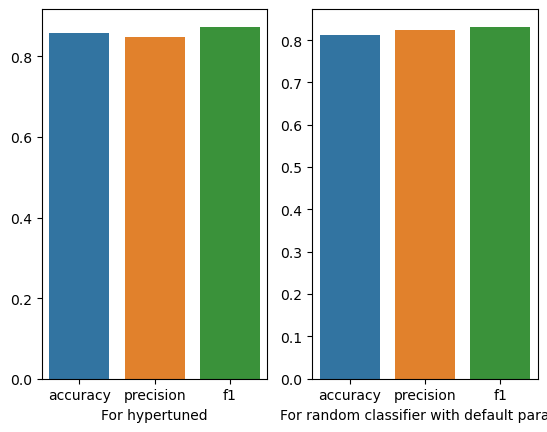

In [40]:
plt.subplot(1,2,1)
sns.barplot(x=['accuracy','precision','f1'],y=[ac1,pr1,f1_1])
plt.xlabel('For hypertuned')
plt.subplot(1,2,2)
sns.barplot(x=['accuracy','precision','f1'],y=[ac,pr,f1])
plt.xlabel('For random classifier with default params')